## Mean Shift

notes for this video series: https://www.youtube.com/watch?v=3ERPpzrDkVg&index=39&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

## Video 39: Mean Shift

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls

#Base on the code in K Means

df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)  # this is new, make a copy of the original df
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))
        
    return df

In [41]:
df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [42]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group'] = np.nan


In [30]:
for i, label in enumerate(labels):
        #original_df['cluster_group'].iloc[i] = label
        original_df.loc.__setitem__(('cluster_group', i), label)   ##me revised to avoid warning

In [31]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.373581847649919, 1: 0.19230769230769232, 2: 1.0, 3: 0.675, 4: 0.0}


## Video 41: Mean Shift from Scratch

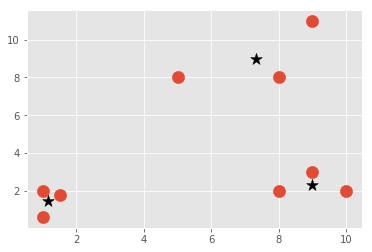

In [45]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

Make all datapoints centroids
Take mean of all featuresets within centroid's radius, setting this mean as new centroid.
Repeat step #2 until convergence.